In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | ocos
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | mnogovershinnyy
Processing Record 6 of Set 1 | pontes e lacerda
Processing Record 7 of Set 1 | general roca
Processing Record 8 of Set 1 | hihya
Processing Record 9 of Set 1 | parasia
Processing Record 10 of Set 1 | nikita
Processing Record 11 of Set 1 | dingle
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | kiruna
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | kaeo
Processing Record 22 of Se

Processing Record 37 of Set 4 | gavrilov-yam
Processing Record 38 of Set 4 | rosarito
Processing Record 39 of Set 4 | bani
Processing Record 40 of Set 4 | ostrovnoy
Processing Record 41 of Set 4 | wuwei
Processing Record 42 of Set 4 | buin
Processing Record 43 of Set 4 | dubbo
Processing Record 44 of Set 4 | mogadishu
Processing Record 45 of Set 4 | matehuala
Processing Record 46 of Set 4 | asau
Processing Record 47 of Set 4 | ilulissat
Processing Record 48 of Set 4 | formoso do araguaia
City not found. Skipping...
Processing Record 49 of Set 4 | puerto ayora
Processing Record 50 of Set 4 | necochea
Processing Record 1 of Set 5 | kaitangata
Processing Record 2 of Set 5 | lebu
Processing Record 3 of Set 5 | namatanai
Processing Record 4 of Set 5 | pangnirtung
Processing Record 5 of Set 5 | arvi
Processing Record 6 of Set 5 | port lincoln
Processing Record 7 of Set 5 | cozumel
Processing Record 8 of Set 5 | mezen
Processing Record 9 of Set 5 | alakurtti
Processing Record 10 of Set 5 | sa

Processing Record 30 of Set 8 | at-bashi
Processing Record 31 of Set 8 | torbay
Processing Record 32 of Set 8 | bulgan
Processing Record 33 of Set 8 | serenje
Processing Record 34 of Set 8 | mikhaylovskoye
Processing Record 35 of Set 8 | concarneau
Processing Record 36 of Set 8 | miyako
Processing Record 37 of Set 8 | faya
Processing Record 38 of Set 8 | katobu
Processing Record 39 of Set 8 | ugoofaaru
Processing Record 40 of Set 8 | beloha
Processing Record 41 of Set 8 | karratha
Processing Record 42 of Set 8 | jinxiang
Processing Record 43 of Set 8 | tonder
Processing Record 44 of Set 8 | bilma
Processing Record 45 of Set 8 | zamora
Processing Record 46 of Set 8 | tocopilla
Processing Record 47 of Set 8 | caorle
Processing Record 48 of Set 8 | nabire
Processing Record 49 of Set 8 | kampene
Processing Record 50 of Set 8 | bataipora
Processing Record 1 of Set 9 | yakeshi
Processing Record 2 of Set 9 | nishihara
Processing Record 3 of Set 9 | puerto armuelles
Processing Record 4 of Set 

Processing Record 19 of Set 12 | touros
Processing Record 20 of Set 12 | coihaique
Processing Record 21 of Set 12 | comodoro rivadavia
Processing Record 22 of Set 12 | masuguru
Processing Record 23 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 24 of Set 12 | carutapera
Processing Record 25 of Set 12 | bozoum
Processing Record 26 of Set 12 | charlestown
Processing Record 27 of Set 12 | odweyne
Processing Record 28 of Set 12 | gurskoye
City not found. Skipping...
Processing Record 29 of Set 12 | payson
Processing Record 30 of Set 12 | cedar rapids
Processing Record 31 of Set 12 | port hedland
Processing Record 32 of Set 12 | narsaq
Processing Record 33 of Set 12 | waingapu
Processing Record 34 of Set 12 | shimoda
Processing Record 35 of Set 12 | lensk
Processing Record 36 of Set 12 | lantawan
Processing Record 37 of Set 12 | irati
Processing Record 38 of Set 12 | lodwar
Processing Record 39 of Set 12 | hohhot
Processing Record 40 of Set 12 | lorengau
Processing Reco

In [10]:
len(city_data)

584

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,78.03,49,20,8.05,US,2022-07-31 23:11:48
1,Ushuaia,-54.8000,-68.3000,38.86,93,40,8.05,AR,2022-07-31 23:10:12
2,Ocos,14.5094,-92.1933,86.18,87,96,16.22,GT,2022-07-31 23:11:48
3,Albany,42.6001,-73.9662,79.52,60,99,4.29,US,2022-07-31 23:11:49
4,Mnogovershinnyy,53.9353,139.9242,67.50,71,37,5.75,RU,2022-07-31 23:11:49
5,Pontes E Lacerda,-15.2261,-59.3353,76.75,31,1,1.12,BR,2022-07-31 23:11:49
6,General Roca,-39.0333,-67.5833,52.02,48,99,2.89,AR,2022-07-31 23:11:49
7,Hihya,30.6713,31.5880,73.96,91,0,5.03,EG,2022-07-31 23:11:50
8,Parasia,22.2000,78.7667,72.12,90,98,5.28,IN,2022-07-31 23:11:50
9,Nikita,44.5333,34.2333,65.88,68,0,8.84,UA,2022-07-31 23:11:50


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-07-31 23:11:48,42.0970,-79.2353,78.03,49,20,8.05
1,Ushuaia,AR,2022-07-31 23:10:12,-54.8000,-68.3000,38.86,93,40,8.05
2,Ocos,GT,2022-07-31 23:11:48,14.5094,-92.1933,86.18,87,96,16.22
3,Albany,US,2022-07-31 23:11:49,42.6001,-73.9662,79.52,60,99,4.29
4,Mnogovershinnyy,RU,2022-07-31 23:11:49,53.9353,139.9242,67.50,71,37,5.75
5,Pontes E Lacerda,BR,2022-07-31 23:11:49,-15.2261,-59.3353,76.75,31,1,1.12
6,General Roca,AR,2022-07-31 23:11:49,-39.0333,-67.5833,52.02,48,99,2.89
7,Hihya,EG,2022-07-31 23:11:50,30.6713,31.5880,73.96,91,0,5.03
8,Parasia,IN,2022-07-31 23:11:50,22.2000,78.7667,72.12,90,98,5.28
9,Nikita,UA,2022-07-31 23:11:50,44.5333,34.2333,65.88,68,0,8.84


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Load and Read csv
city_data_df = pd.read_csv("weather_data/cities.csv")

In [7]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Get today's date in seconds.
today = "07/31/22"

#today = time.strftime("%x")
today

'07/31/22'

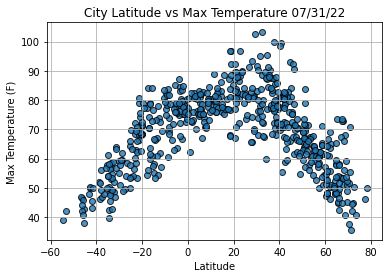

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+ today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

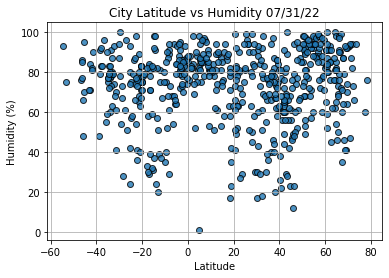

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity "+ today)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

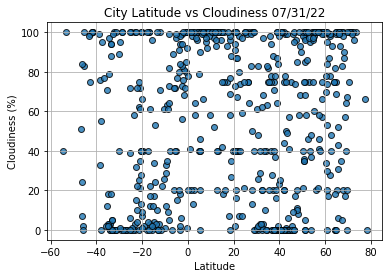

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness "+ today)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

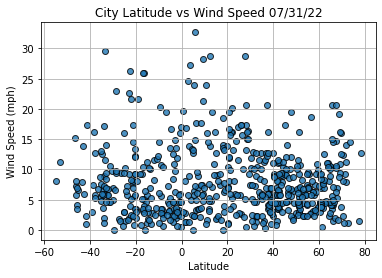

In [19]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed "+ today)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()   

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Jamestown,US,2022-07-31 23:11:48,42.0970,-79.2353,78.03,49,20,8.05
2,2,Ocos,GT,2022-07-31 23:11:48,14.5094,-92.1933,86.18,87,96,16.22
3,3,Albany,US,2022-07-31 23:11:49,42.6001,-73.9662,79.52,60,99,4.29
4,4,Mnogovershinnyy,RU,2022-07-31 23:11:49,53.9353,139.9242,67.50,71,37,5.75
7,7,Hihya,EG,2022-07-31 23:11:50,30.6713,31.5880,73.96,91,0,5.03


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

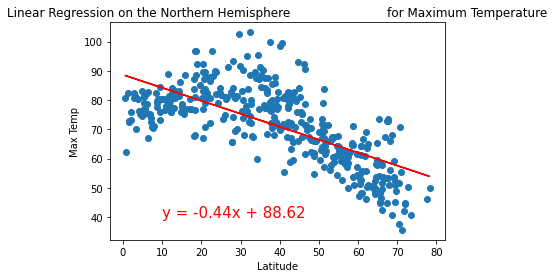

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

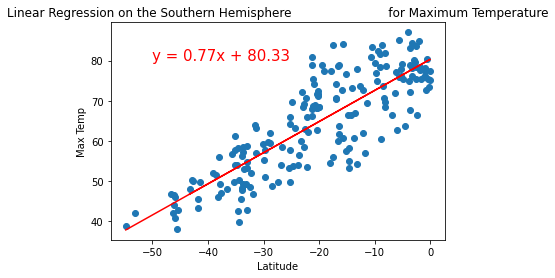

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

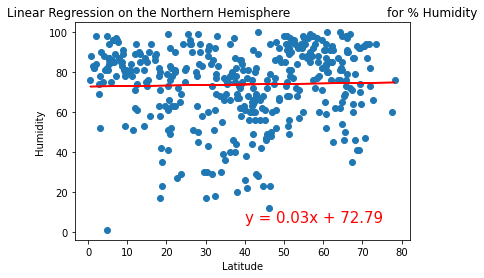

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', 'Humidity',(40,5))

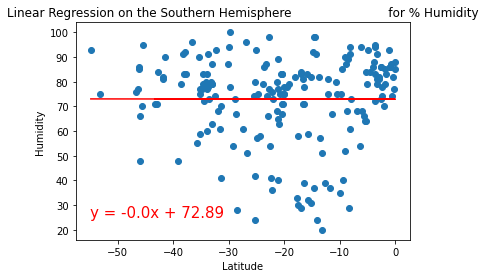

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', 'Humidity',(-55,25))

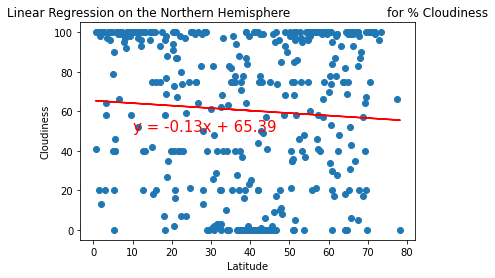

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', 'Cloudiness',(10,50))

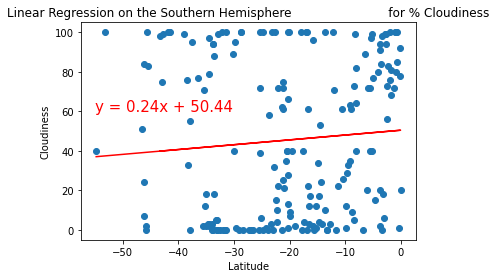

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', 'Cloudiness',(-55,60))

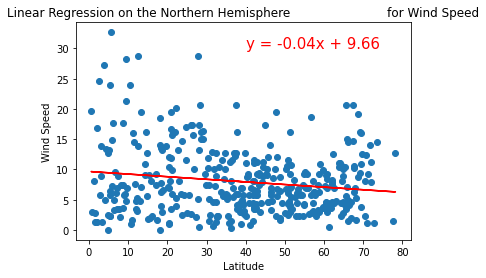

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

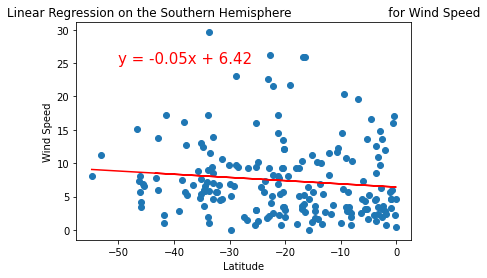

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))